# Tamaulipas

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/able_to_work.csv')
del df["Unnamed: 0"]

for element in ['fecha_reporte', 'fecha_evento', 'fecha_de_ultimo_avistamiento','fecha_de_ingreso',  'fecha_de_localizacion','fecha_probable_de_fallecimiento']:
    df[element] = pd.to_datetime(df[element],errors="coerce") # el errors coerce, tomará todos los errores en fechas como NaT, con lo que vemos inconcistencias

C:\Users\Diego\AppData\Local\Temp\ipykernel_9968\1460404765.py:1: DtypeWarning: Columns (5,7,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/able_to_work.csv')


In [3]:
tamaulipas = df[df["estado"] == "tamaulipas"].copy()
tamaulipas.head()

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,tipo_de_cejas,tamano_de_la_boca,barba,bigote,submarca,tipo_denuncia,tipo_de_evento,tipo_causal,clasificacion_causal,causal
580,desaparecido,2009-09-30 12:00:00,2009-12-09 12:00:00,tamaulipas,28,nuevo_laredo,27,mexicana,no_especificado,masculino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_
585,desaparecido,2009-09-30 12:00:00,2009-12-09 12:00:00,tamaulipas,28,nuevo_laredo,27,mexicana,no_especificado,femenino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_
586,desaparecido,2009-09-30 12:00:00,2009-12-09 12:00:00,tamaulipas,28,nuevo_laredo,27,mexicana,no_especificado,femenino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_
587,desaparecido,2010-09-02 12:00:00,2010-01-18 12:00:00,tamaulipas,28,nuevo_laredo,27,mexicana,no_especificado,femenino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_
592,desaparecido,2010-09-13 12:00:00,2010-07-17 12:00:00,tamaulipas,28,nuevo_laredo,27,mexicana,no_especificado,masculino,...,NaN,NaN,NaN,NaN,no_especificado,NaN,eventos_validados,_,_,_


In [4]:
tamaulipas['year_reporte'] = tamaulipas['fecha_reporte'].dt.year
tamaulipas["dias_de_busqueda_reporte"] = tamaulipas["fecha_de_localizacion"] - tamaulipas["fecha_reporte"]
tamaulipas["dias_de_busqueda_evento"] = tamaulipas["fecha_de_localizacion"] - tamaulipas["fecha_evento"]
tamaulipas[["year_reporte", "dias_de_busqueda_reporte","dias_de_busqueda_evento"]].head()

,year_reporte,dias_de_busqueda_reporte,dias_de_busqueda_evento
580,2009,NaT,NaT
585,2009,NaT,NaT
586,2009,NaT,NaT
587,2010,NaT,NaT
592,2010,NaT,NaT


In [5]:
tamaulipas.rename(columns = {"estado_(localizado)" : "estado_localizado"}, inplace = True)

In [6]:
len(tamaulipas)

9128

In [7]:
tamaulipas.sexo.value_counts()

masculino    6188
femenino     2940
Name: sexo, dtype: int64

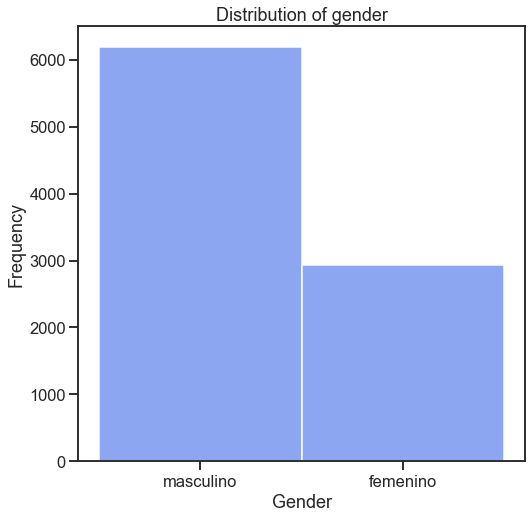

In [8]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

sns.set_palette("coolwarm")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender')

sns.histplot(tamaulipas.sexo)
plt.show()

In [9]:
tamaulipas.vivo_o_muerto.value_counts()

aun_sin_localizar    5993
vivo                 2906
muerto                229
Name: vivo_o_muerto, dtype: int64

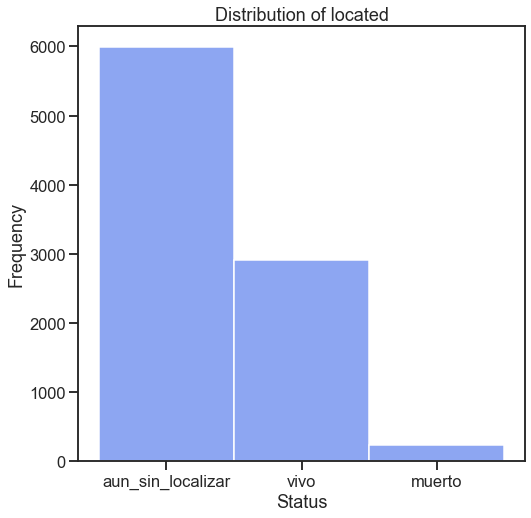

In [10]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Status')
plt.title('Distribution of located')

sns.histplot(tamaulipas.vivo_o_muerto)
plt.show()

In [11]:
tamaulipas[(tamaulipas["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 1623
aun_sin_localizar    1275
muerto                 42
Name: vivo_o_muerto, dtype: int64

In [12]:
tamaulipas[(tamaulipas["sexo"] == "masculino")].vivo_o_muerto.value_counts()

aun_sin_localizar    4718
vivo                 1283
muerto                187
Name: vivo_o_muerto, dtype: int64

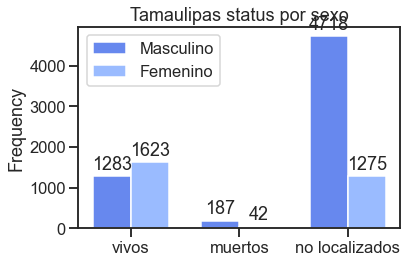

In [13]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 1283,187,4718]
women_means = [1623, 42, 1275]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Tamaulipas status por sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [14]:
tamaulipas[(tamaulipas["sexo"] == "masculino")].posible_causa_desaparicion.value_counts()

no_especificado                                            504
se_desconoce                                                62
sin_dato                                                    35
privacion                                                   17
no_especificado.                                            16
                                                          ... 
se_enojo_con_sus_papás_se_fue_de_la_casa.                    1
fue_hallado_en_domicilio.                                    1
robo_del_cajero                                              1
se_va_de_la_casa_por_problemas_conyugales                    1
se_fue_a_vivir_a_un_albergue_porque_su_yerno_lo_corrioñ      1
Name: posible_causa_desaparicion, Length: 457, dtype: int64

In [15]:
tamaulipas[(tamaulipas["sexo"] == "masculino")].posible_causa_desaparicion.value_counts().head(20)

no_especificado                                              504
se_desconoce                                                  62
sin_dato                                                      35
privacion                                                     17
no_especificado.                                              16
problemas_familiares                                          11
vivo                                                          10
privacion_ilegal_de_la_libertad                               10
privado_de_su_libertad.                                        7
secuestro                                                      7
problemas_familiares.                                          6
conflictos_familiares.                                         4
sin_datos                                                      4
salio_rumbo_a_su_trabajo.                                      3
sin_dato.                                                      3
privacion_de_la_libertad 

In [16]:
tamaulipas[(tamaulipas["sexo"] == "femenino")].posible_causa_desaparicion.value_counts()

no_especificado                                                     542
se_desconoce                                                         37
sin_dato                                                             32
problemas_familiares                                                 32
se_fue_con_el_novio                                                  25
                                                                   ... 
estaba_embarazada_y_le_dio_miedo_la_reaccion_de_su_mama               1
se_molesto_con_su_madre.                                              1
salio_a_dar_la_vuelta_con_sus_tias_y_sus_novios                       1
se_encontaba_en_otra_ciudad.                                          1
estaban_con_sus_tios_y_estos_no_querian_hacer_entrega_a_su_madre      1
Name: posible_causa_desaparicion, Length: 530, dtype: int64

In [17]:
tamaulipas[(tamaulipas["sexo"] == "femenino")].posible_causa_desaparicion.value_counts().head(20)

no_especificado                         542
se_desconoce                             37
sin_dato                                 32
problemas_familiares                     32
se_fue_con_el_novio                      25
problemas_familiares.                    15
privacion                                14
privacion_ilegal_de_la_libertad           9
vivo                                      7
se_fue_a_vivir_con_su_novio               7
no_especificado.                          6
se_fue_a_vivir_con_su_novio.              5
se_fue_a_vivir_con_el_novio               5
sin_datos                                 4
sin_dato.                                 3
desaparecida                              3
se_fue_a_casa_de_su_novio.                3
se_habia_ido_con_el_novio                 3
se_fue_con_su_novio.                      3
se_fue_a_vivir_a_la_casa_de_su_novio      2
Name: posible_causa_desaparicion, dtype: int64

In [18]:
tamaulipas[(tamaulipas["sexo"] == "femenino")].relacion_con_grupos_delictivos.value_counts()

no    2939
si       1
Name: relacion_con_grupos_delictivos, dtype: int64

In [19]:
tamaulipas[(tamaulipas["sexo"] == "masculino")].relacion_con_grupos_delictivos.value_counts()

no    6186
si       2
Name: relacion_con_grupos_delictivos, dtype: int64

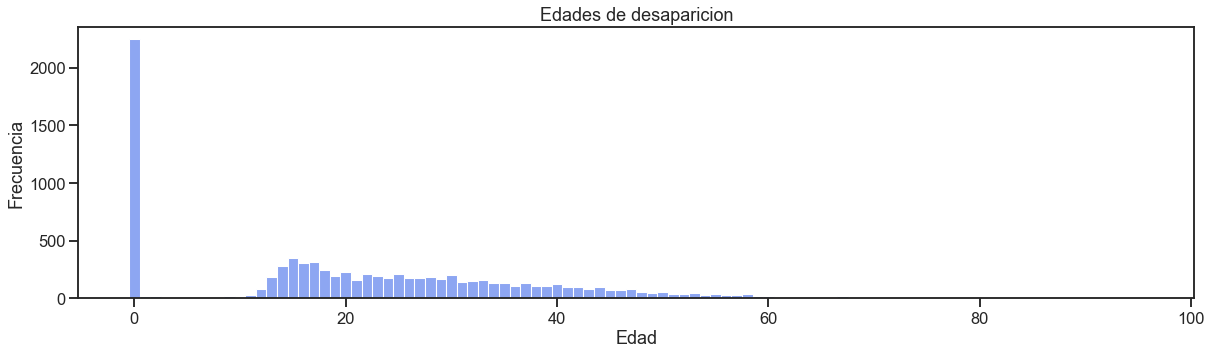

In [20]:
plt.figure(figsize=(20, 5))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(tamaulipas.edad,discrete='True')

plt.title('Edades de desaparicion')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

In [21]:
tamaulipas.edad.value_counts().head(6)

0.0     2245
15.0     349
17.0     311
16.0     308
14.0     278
18.0     246
Name: edad, dtype: int64

<BarContainer object of 6 artists>

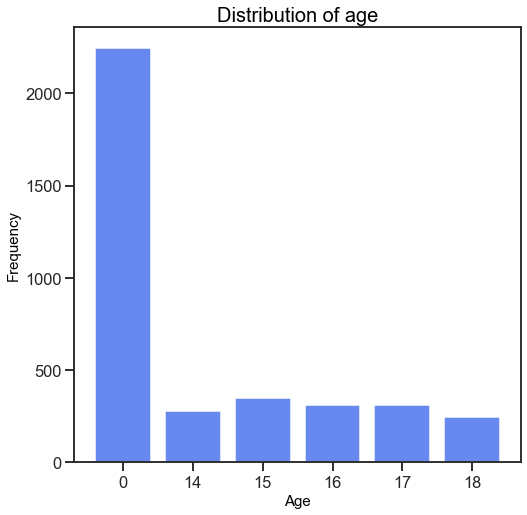

In [22]:
labels = ["0", "14", "15", "16", "17", "18"]
values = [2245, 278, 349, 308, 311, 246]

plt.figure(figsize=(8, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Age',fontdict=font2)
plt.title('Distribution of age', fontdict=font1)

plt.bar(labels,values)

## Bebés desaparecidos

In [23]:
tamaulipas.fecha_de_nacimiento.value_counts().head()

01/01/00_0:00    5418
_                 496
01/01/97_0:00      18
01/01/89_0:00      15
01/01/86_0:00      15
Name: fecha_de_nacimiento, dtype: int64

In [24]:
len(tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["fecha_de_nacimiento"] == "_")])

2

In [25]:
len(tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["fecha_de_nacimiento"] == "01/01/00_0:00")])

2214

In [26]:
tamaulipas[(tamaulipas["edad"] == 0.0 )].sexo.value_counts()

masculino    1554
femenino      691
Name: sexo, dtype: int64

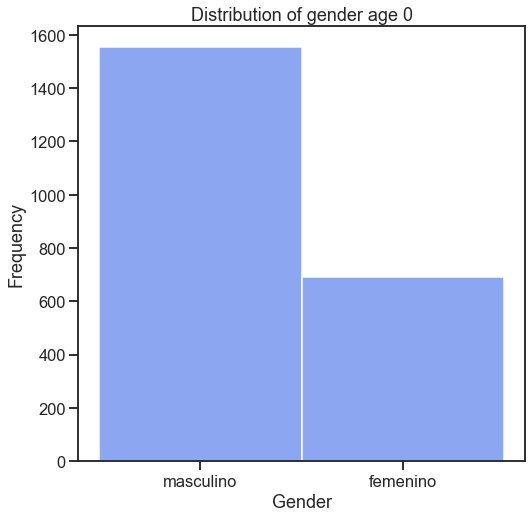

In [27]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender age 0')

sns.histplot(tamaulipas[(tamaulipas["edad"] == 0.0 )].sexo)
plt.show()

In [28]:
tamaulipas[(tamaulipas["edad"] == 0.0 )].vivo_o_muerto.value_counts()

aun_sin_localizar    1447
vivo                  734
muerto                 64
Name: vivo_o_muerto, dtype: int64

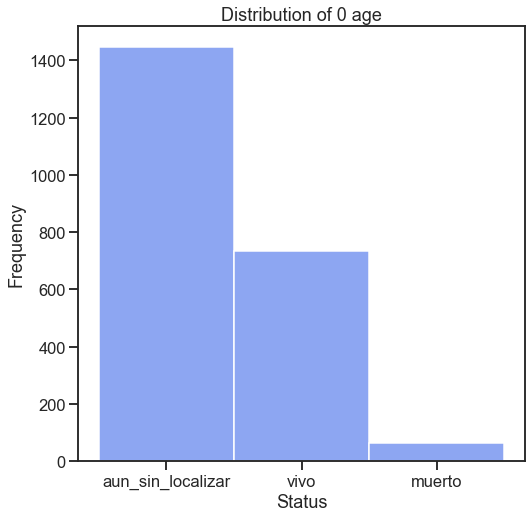

In [29]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Status')
plt.title('Distribution of 0 age')

sns.histplot(tamaulipas[(tamaulipas["edad"] == 0.0 )].vivo_o_muerto)
plt.show()

In [30]:
tamaulipas[(tamaulipas["edad"] == 0.0 )].year_reporte.value_counts()

2012    583
2011    374
2014    364
2013    315
2010    274
2015    127
2009     91
2016     60
2007     33
2008     23
2006      1
Name: year_reporte, dtype: int64

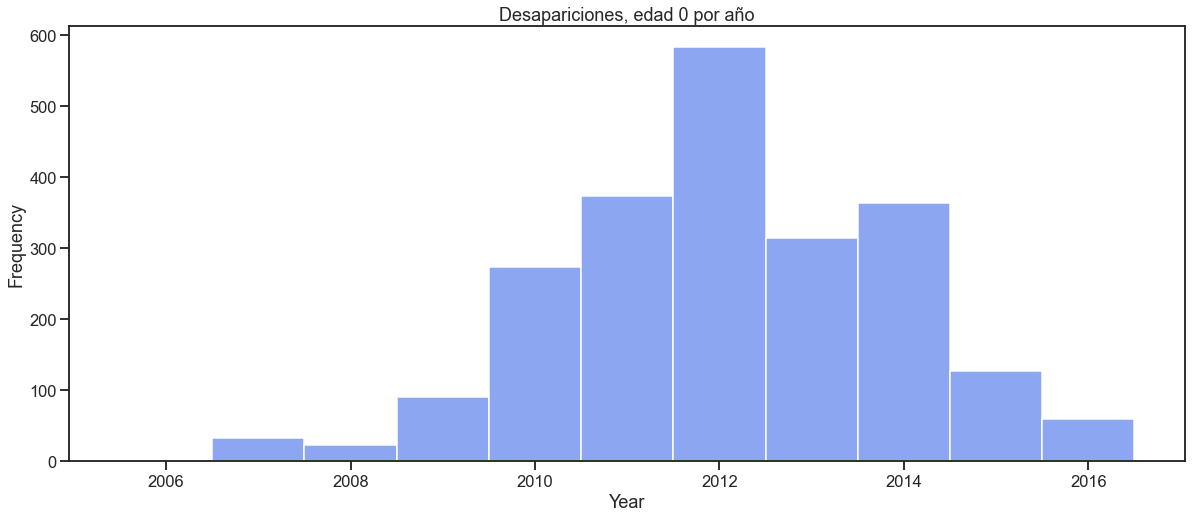

In [31]:
plt.figure(figsize=(20, 8))

sns.color_palette("rocket", as_cmap=True)
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Desapariciones, edad 0 por año')

sns.histplot(tamaulipas[(tamaulipas["edad"] == 0.0 )].year_reporte,discrete="true")
plt.show()

## observación agregada al observar el comportamiento de Chihuahua-----

In [32]:
tamaulipas[(tamaulipas["edad"] == 0.0 )].posible_causa_desaparicion.value_counts()

no_especificado                                                                         408
se_desconoce                                                                             27
sin_dato                                                                                 19
problemas_familiares                                                                      6
problemas_familiares.                                                                     3
                                                                                       ... 
detencion.                                                                                1
se_encuentra_con_sus_abuelos_ya_que_no_dejan_vistarlo_o_ayudarlo_para_sus_alimentos.      1
salio_rumbo_a_su_trabajo.                                                                 1
conflictos_legales_(detenido).                                                            1
estaban_con_sus_tios_y_estos_no_querian_hacer_entrega_a_su_madre                

In [33]:
tamaulipas[(tamaulipas["edad"] == 0.0)][["edad","fecha_de_nacimiento","fecha_reporte","posible_causa_desaparicion"]].T

,608,663,675,684,1333,1339,2315,2316,2317,2321,...,93804,93848,94016,94020,94150,94256,95135,97224,97428,97695
edad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fecha_de_nacimiento,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,...,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00
fecha_reporte,2009-08-19 12:00:00,2012-01-13 12:00:00,2012-01-23 12:00:00,2012-06-14 10:05:57,2012-08-05 12:00:00,2012-05-28 12:00:00,2007-09-07 12:00:00,2007-05-07 12:00:00,2007-04-14 12:00:00,2012-01-13 12:00:00,...,2016-01-18 12:00:00,2016-05-20 12:00:00,2015-10-15 10:00:00,2015-10-19 10:00:00,2015-10-16 10:00:00,2015-10-11 12:00:00,2015-12-22 12:00:00,2016-03-02 12:00:00,2016-04-29 12:00:00,2016-07-06 12:00:00
posible_causa_desaparicion,NaN,se_desconoce,no_especificado,vivo,NaN,NaN,sin_dato,problemas_familiarez,NaN,no_se_especifica,...,NaN,NaN,NaN,se_fue_a_vivir_a_un_albergue_porque_su_yerno_l...,NaN,NaN,estaban_con_sus_tios_y_estos_no_querian_hacer_...,NaN,NaN,NaN


## fin de lo agregado después ----- 

In [34]:
tamaulipas[(tamaulipas["edad"] == 0.0 )].estado_localizado.value_counts()

no_especificado         433
tamaulipas              373
veracruz                  4
distrito_federal          3
nuevo_leon                3
texas                     2
hidalgo                   2
san_luis_potosi           1
baja_california           1
coahuila_de_zaragoza      1
nayarit                   1
estado_de_mexico          1
Name: estado_localizado, dtype: int64

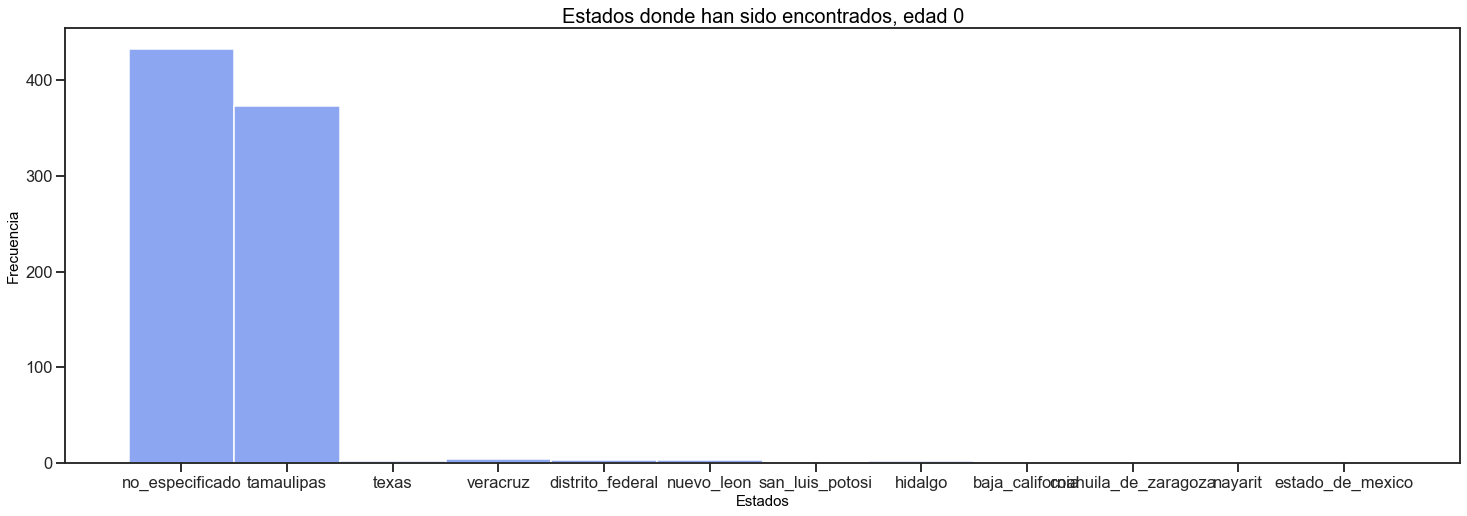

In [35]:
plt.figure(figsize=(25, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frecuencia',fontdict=font2)
plt.xlabel('Estados',fontdict=font2)
plt.title('Estados donde han sido encontrados, edad 0', fontdict=font1)

sns.histplot(tamaulipas[(tamaulipas["edad"] == 0.0 )].estado_localizado)
plt.show()

In [36]:
tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

no_especificado         373
tamaulipas              330
veracruz                  4
distrito_federal          3
nuevo_leon                3
texas                     2
hidalgo                   2
san_luis_potosi           1
baja_california           1
coahuila_de_zaragoza      1
nayarit                   1
estado_de_mexico          1
Name: estado_localizado, dtype: int64

In [37]:
tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

tamaulipas         43
no_especificado    21
Name: estado_localizado, dtype: int64

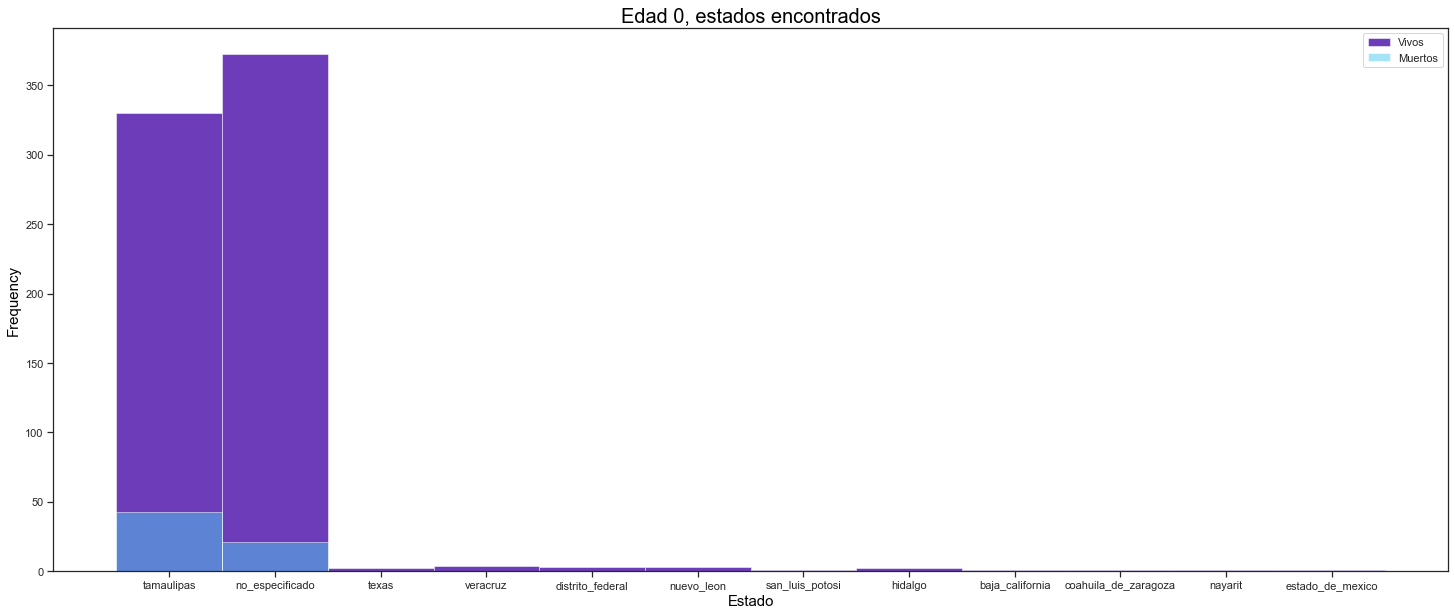

In [38]:
plt.figure(figsize=(25,10))

sns.set_theme(style="ticks")

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

sns.histplot(tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
sns.histplot(tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee

plt.legend()

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Estado',fontdict=font2)
plt.title('Edad 0, estados encontrados',fontdict=font1)

plt.show()

In [39]:
tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["vivo_o_muerto"] == "vivo")].dias_de_busqueda_reporte.value_counts()

0 days        43
1 days        24
2 days        14
31 days       13
3 days        12
              ..
-85 days       1
1701 days      1
-69 days       1
-3363 days     1
29 days        1
Name: dias_de_busqueda_reporte, Length: 499, dtype: int64

In [40]:
tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["vivo_o_muerto"] == "vivo")].dias_de_busqueda_evento.value_counts()

0 days 00:00:00         34
1 days 00:00:00         22
3 days 00:00:00         16
2 days 00:00:00         12
31 days 00:00:00        12
                        ..
-4386 days +00:00:00     1
-3937 days +00:00:00     1
-203 days +00:00:00      1
40 days 00:00:00         1
1 days 19:00:00          1
Name: dias_de_busqueda_evento, Length: 497, dtype: int64

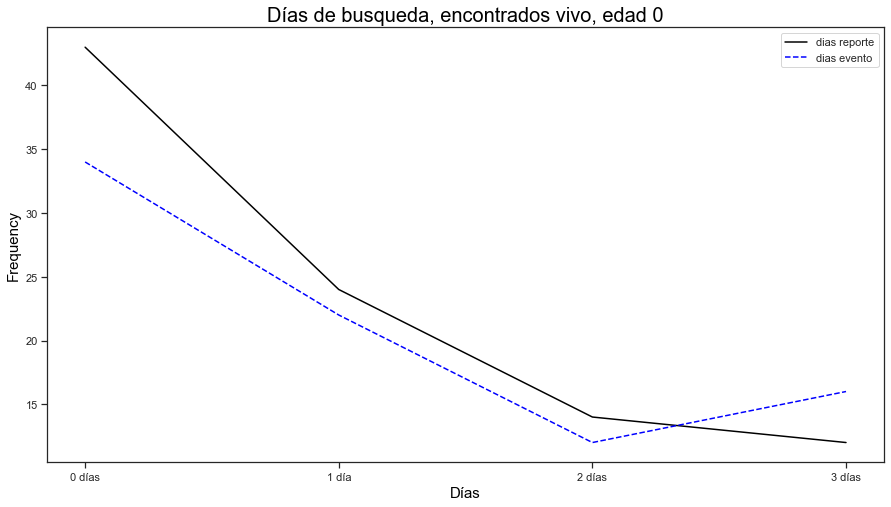

In [41]:
labelsRv = ["0 días", "1 día", "2 días", "3 días"]
valuesRv = [43, 24, 14, 12]


labelsEv = ["0 días", "1 día", "2 días", "3 días"]
valuesEv = [34, 22, 12, 16]

plt.figure(figsize=(15, 8))

plt.plot(labelsRv,valuesRv,color='black',linestyle='solid', label="dias reporte")
plt.plot(labelsEv,valuesEv,color='blue',linestyle='dashed', label="dias evento")
plt.legend(loc="upper right")

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Días',fontdict=font2)
plt.title('Días de busqueda, encontrados vivo, edad 0', fontdict=font1)

plt.show()

In [42]:
tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["vivo_o_muerto"] == "muerto")].dias_de_busqueda_reporte.value_counts().head()

0 days 00:00:00         5
-4578 days +00:00:00    3
11 days 23:09:18        3
73 days 05:50:38        2
465 days 00:00:00       1
Name: dias_de_busqueda_reporte, dtype: int64

In [43]:
tamaulipas[(tamaulipas["edad"] == 0.0 ) & (tamaulipas["vivo_o_muerto"] == "muerto")].dias_de_busqueda_evento.value_counts().head()

16 days       4
-4578 days    3
533 days      2
-83 days      2
-4531 days    2
Name: dias_de_busqueda_evento, dtype: int64

# Continuamos con exploratorio sobre edades más comunes

15.0     349  
17.0     311  
16.0     308  
14.0     278  
18.0     246

## 15 años 

In [44]:
tamaulipas[(tamaulipas["edad"] == 15 )].sexo.value_counts()

femenino     254
masculino     95
Name: sexo, dtype: int64

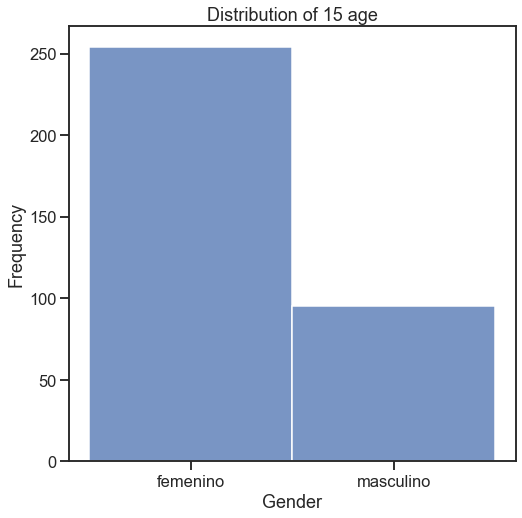

In [45]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of 15 age')

sns.histplot(tamaulipas[(tamaulipas["edad"] == 15 )].sexo)
plt.show()

In [46]:
tamaulipas[(tamaulipas["edad"] == 15 )].vivo_o_muerto.value_counts()

vivo                 236
aun_sin_localizar    106
muerto                 7
Name: vivo_o_muerto, dtype: int64

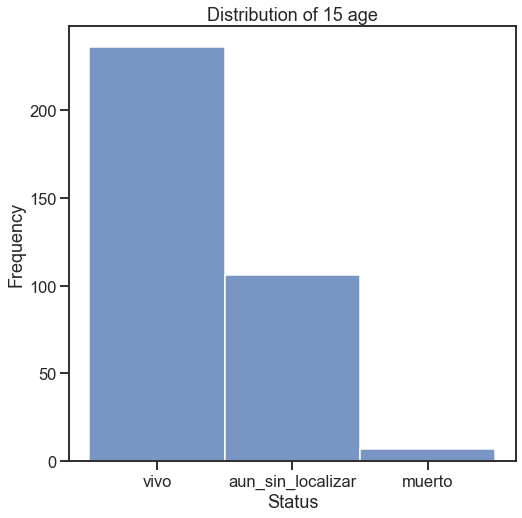

In [47]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Status')
plt.title('Distribution of 15 age')

sns.histplot(tamaulipas[(tamaulipas["edad"] == 15 )].vivo_o_muerto)
plt.show()

In [48]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "femenino")].vivo_o_muerto.value_counts()

vivo                 194
aun_sin_localizar     58
muerto                 2
Name: vivo_o_muerto, dtype: int64

In [49]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "masculino")].vivo_o_muerto.value_counts()

aun_sin_localizar    48
vivo                 42
muerto                5
Name: vivo_o_muerto, dtype: int64

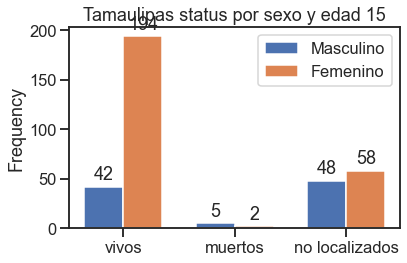

In [50]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 42,5,48]
women_means = [194, 2, 58]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Tamaulipas status por sexo y edad 15')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [51]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

tamaulipas         118
no_especificado     47
queretaro            2
guanajuato           2
nuevo_leon           2
san_luis_potosi      1
Name: estado_localizado, dtype: int64

In [52]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

tamaulipas    2
Name: estado_localizado, dtype: int64

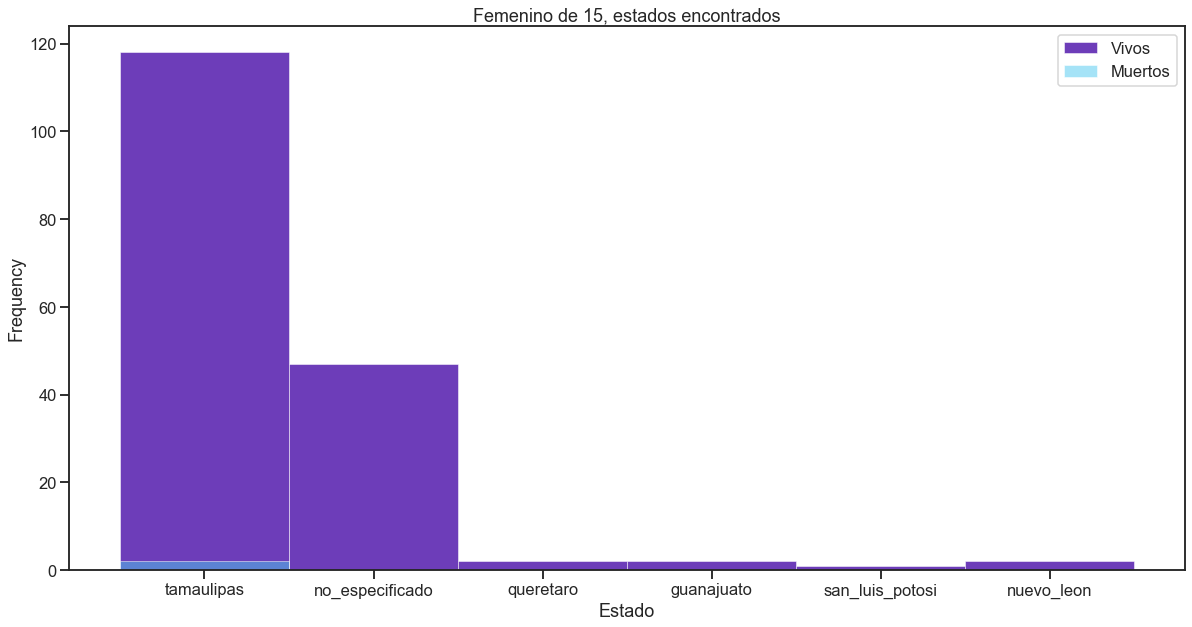

In [53]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
sns.histplot(tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femenino de 15, estados encontrados')

plt.show()

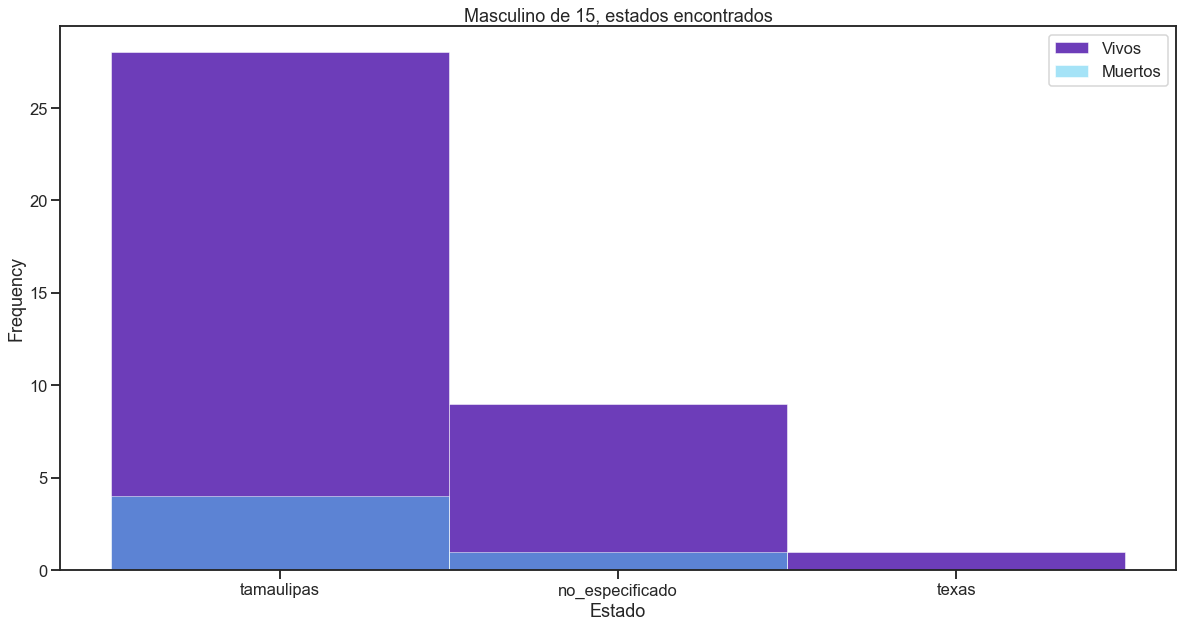

In [54]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
sns.histplot(tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Masculino de 15, estados encontrados')

plt.show()

In [55]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

tamaulipas         4
no_especificado    1
Name: estado_localizado, dtype: int64

In [56]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

tamaulipas         28
no_especificado     9
texas               1
Name: estado_localizado, dtype: int64

## 15 años, encontrados en Tamaulipas, días de busqueda

In [57]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "vivo") & (tamaulipas["estado_localizado"] == "tamaulipas")].dias_de_busqueda_reporte.value_counts()

0 days 00:00:00       17
1 days 00:00:00        8
3 days 00:00:00        5
2 days 00:00:00        4
61 days 00:00:00       3
                      ..
-1 days +20:30:00      1
-56 days +06:53:00     1
12 days 09:51:00       1
-30 days +00:00:00     1
101 days 00:00:00      1
Name: dias_de_busqueda_reporte, Length: 82, dtype: int64

In [58]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "vivo") & (tamaulipas["estado_localizado"] == "tamaulipas")].dias_de_busqueda_evento.value_counts()

3 days 00:00:00       6
0 days 00:00:00       6
2 days 00:00:00       5
31 days 00:00:00      5
4 days 00:00:00       4
                     ..
16 days 00:00:00      1
182 days 20:30:00     1
-25 days +01:25:00    1
13 days 00:00:00      1
101 days 00:00:00     1
Name: dias_de_busqueda_evento, Length: 91, dtype: int64

In [59]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "vivo") & (tamaulipas["estado_localizado"] == "tamaulipas")].dias_de_busqueda_reporte.value_counts()

1 days 00:00:00         4
0 days 00:00:00         2
2 days 00:10:00         1
-183 days +00:20:00     1
106 days 04:04:00       1
31 days 08:56:00        1
21 days 04:30:00        1
31 days 00:00:00        1
0 days 03:01:00         1
193 days 09:06:00       1
-3 days +10:27:05       1
-77 days +00:00:00      1
-76 days +00:00:00      1
-4659 days +00:00:00    1
-81 days +00:00:00      1
92 days 00:00:00        1
214 days 02:48:00       1
635 days 00:00:00       1
-1 days +16:38:00       1
4 days 00:00:00         1
5 days 02:01:00         1
-4718 days +00:00:00    1
2899 days 19:00:00      1
-1 days +16:24:00       1
Name: dias_de_busqueda_reporte, dtype: int64

In [60]:
tamaulipas[(tamaulipas["edad"] == 15 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "vivo") & (tamaulipas["estado_localizado"] == "tamaulipas")].dias_de_busqueda_evento.value_counts()

1 days 00:00:00         3
3 days 00:00:00         2
-76 days +00:00:00      1
-60 days +10:00:00      1
257 days 00:00:00       1
92 days 05:30:00        1
21 days 04:31:00        1
35 days 00:00:00        1
1 days 04:40:00         1
201 days 00:00:00       1
0 days 00:00:00         1
-70 days +00:00:00      1
3 days 09:00:00         1
-81 days +00:00:00      1
-4629 days +00:00:00    1
153 days 04:00:00       1
216 days 04:00:00       1
978 days 00:00:00       1
-85 days +17:00:00      1
4 days 00:00:00         1
10 days 00:00:00        1
32 days 00:00:00        1
-4627 days +00:00:00    1
2905 days 19:00:00      1
58 days 23:00:00        1
Name: dias_de_busqueda_evento, dtype: int64

## Posibles causas de desaparición

In [61]:
tamaulipas[(tamaulipas["sexo"] == "femenino") & (tamaulipas["edad"]==15)].posible_causa_desaparicion.value_counts()

no_especificado                                                                                                      51
se_desconoce                                                                                                          4
problemas_familiares.                                                                                                 4
sin_dato                                                                                                              4
se_fue_con_el_novio                                                                                                   4
                                                                                                                     ..
se_habia_ido_con_el_novio                                                                                             1
refiere_la_menor_que_no_recuerda_nada_el_día_de_su_desaparición.                                                      1
se_molesto_con_su_madre.                

In [62]:
tamaulipas[(tamaulipas["sexo"] == "masculino") & (tamaulipas["edad"]==15)].posible_causa_desaparicion.value_counts()

no_especificado                                                                                                                                                                             15
se_perdio_y_andubo_de_camion_en_camion_hasta_que_lo_encontraron                                                                                                                              1
sin_dato                                                                                                                                                                                     1
se_salio_de_su_domicilio_para_ir_a_casa_de_su_novia.                                                                                                                                         1
se_fue_a_vivir_con_el_novio                                                                                                                                                                  1
intento_cruzar_el_rio_bravo,_estado_unidos_lo

### Datos aleatorios que se me va ocurriendo revisar,edad 15 años

In [63]:
tamaulipas[(tamaulipas["edad"]==15)].discapacidad_mental.value_counts()

no    347
si      2
Name: discapacidad_mental, dtype: int64

In [64]:
tamaulipas[(tamaulipas["edad"]==15)].relacion_con_grupos_delictivos.value_counts()

no    349
Name: relacion_con_grupos_delictivos, dtype: int64

In [65]:
tamaulipas[(tamaulipas["edad"]==15)].enfermedad.value_counts()

no_especificado           184
ninguna                    72
ninguno                    42
sin_dato                   35
asma                        2
problemas_de_lenguaje       1
no                          1
anemia                      1
ningunp                     1
ningun                      1
capacidades_diferentes      1
esquisofrenia               1
ni                          1
Name: enfermedad, dtype: int64

In [66]:
tamaulipas[(tamaulipas["edad"]==15) & (tamaulipas["sexo"]=="femenino")].estatura.value_counts().head()

0.00    132
1.60     30
1.50     22
1.55     16
1.65     13
Name: estatura, dtype: int64

In [67]:
tamaulipas[(tamaulipas["edad"]==15)].ocupacion.value_counts()

estudiante                        99
no_especificado                   38
sin_dato                          10
desempleado                        8
empleado_particular                5
ama_de_casa                        2
lavacoches                         2
comerciante                        1
empleada_domestica_(sirvienta)     1
estilista                          1
albañil                            1
Name: ocupacion, dtype: int64

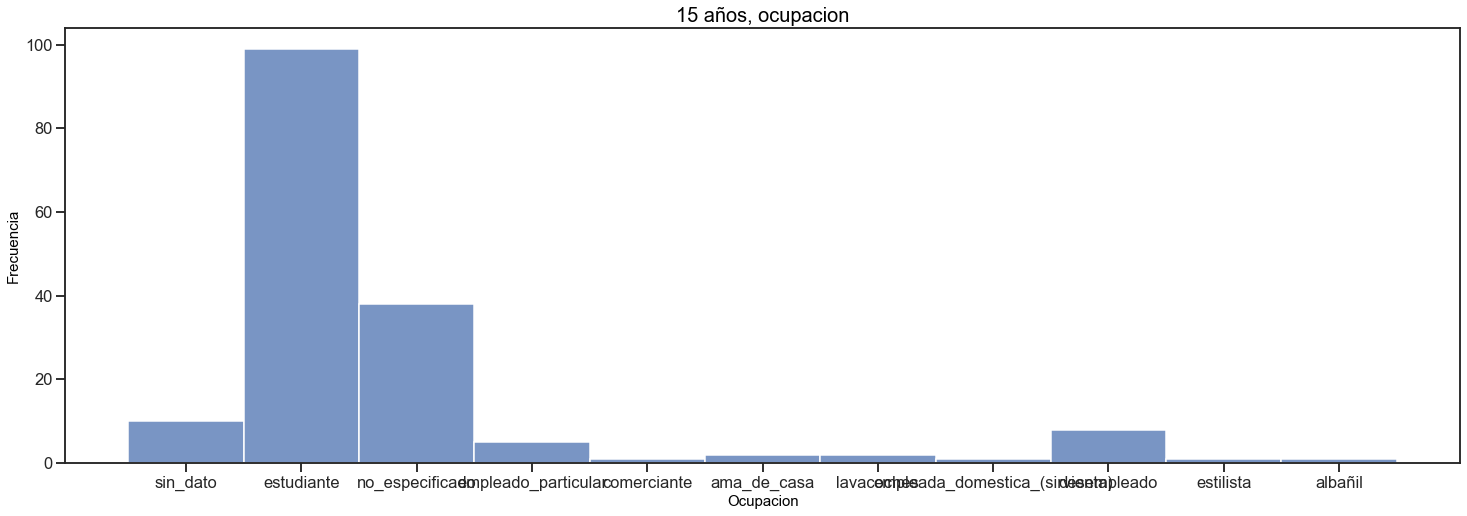

In [68]:
plt.figure(figsize=(25, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frecuencia',fontdict=font2)
plt.xlabel('Ocupacion',fontdict=font2)
plt.title('15 años, ocupacion', fontdict=font1)

sns.histplot(tamaulipas[(tamaulipas["edad"] == 15 )].ocupacion)
plt.show()

## 17 años

In [69]:
tamaulipas[(tamaulipas["edad"] == 17 )].sexo.value_counts()

femenino     174
masculino    137
Name: sexo, dtype: int64

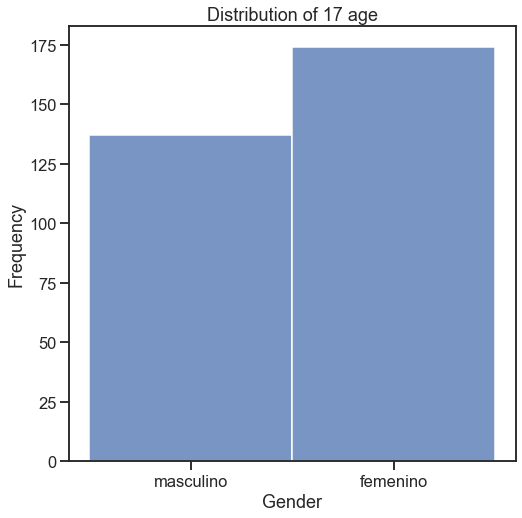

In [70]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of 17 age')

sns.histplot(tamaulipas[(tamaulipas["edad"] == 17 )].sexo)
plt.show()

In [71]:
tamaulipas[(tamaulipas["edad"] == 17 )].vivo_o_muerto.value_counts()

vivo                 161
aun_sin_localizar    144
muerto                 6
Name: vivo_o_muerto, dtype: int64

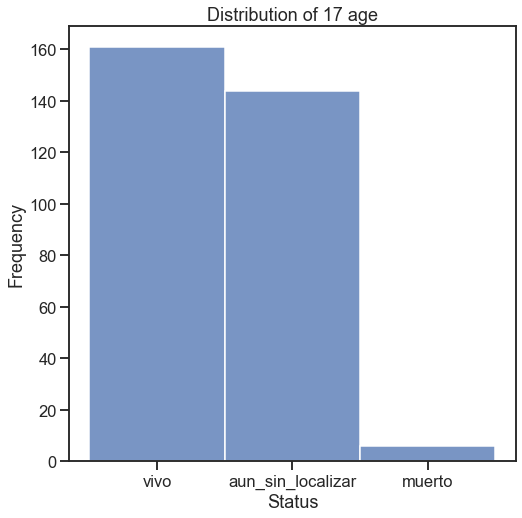

In [72]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Status')
plt.title('Distribution of 17 age')

sns.histplot(tamaulipas[(tamaulipas["edad"] == 17 )].vivo_o_muerto)
plt.show()

In [73]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "femenino")].vivo_o_muerto.value_counts()

vivo                 111
aun_sin_localizar     63
Name: vivo_o_muerto, dtype: int64

In [74]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "masculino")].vivo_o_muerto.value_counts()

aun_sin_localizar    81
vivo                 50
muerto                6
Name: vivo_o_muerto, dtype: int64

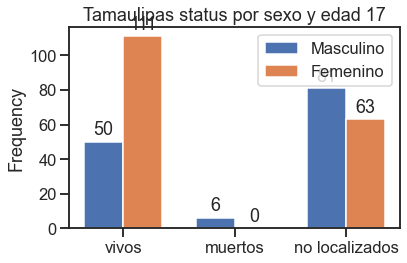

In [75]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 50,6,81]
women_means = [111, 0, 63]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Tamaulipas status por sexo y edad 17')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [76]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

tamaulipas         70
no_especificado    28
nuevo_leon          1
chiapas             1
san_luis_potosi     1
Name: estado_localizado, dtype: int64

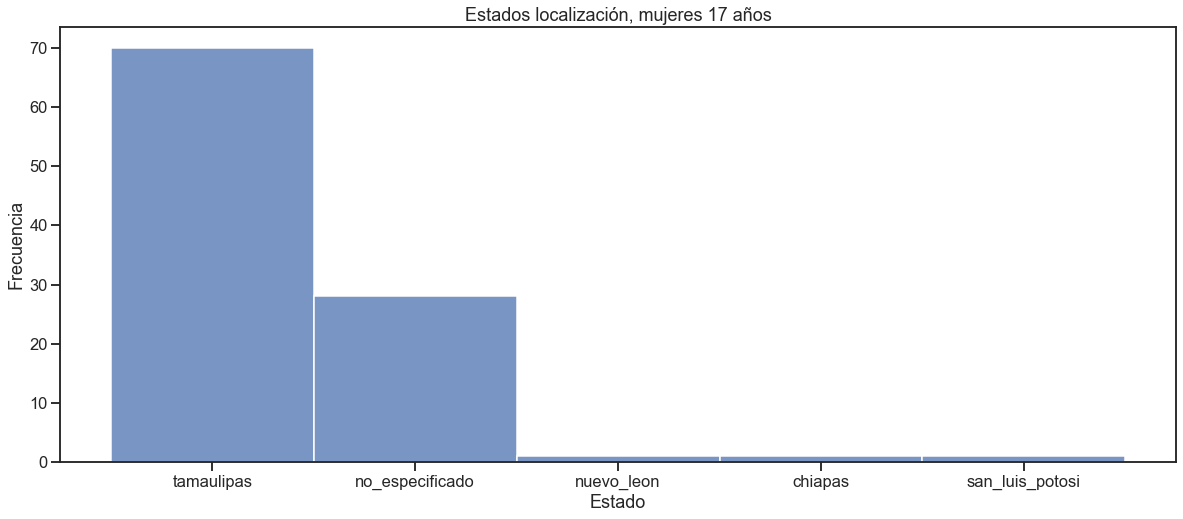

In [77]:
plt.figure(figsize=(20, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frecuencia')
plt.xlabel('Estado')
plt.title('Estados localización, mujeres 17 años')

sns.histplot(tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado)
plt.show()

In [78]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

tamaulipas         35
no_especificado     8
sinaloa             1
veracruz            1
Name: estado_localizado, dtype: int64

In [79]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

tamaulipas         5
no_especificado    1
Name: estado_localizado, dtype: int64

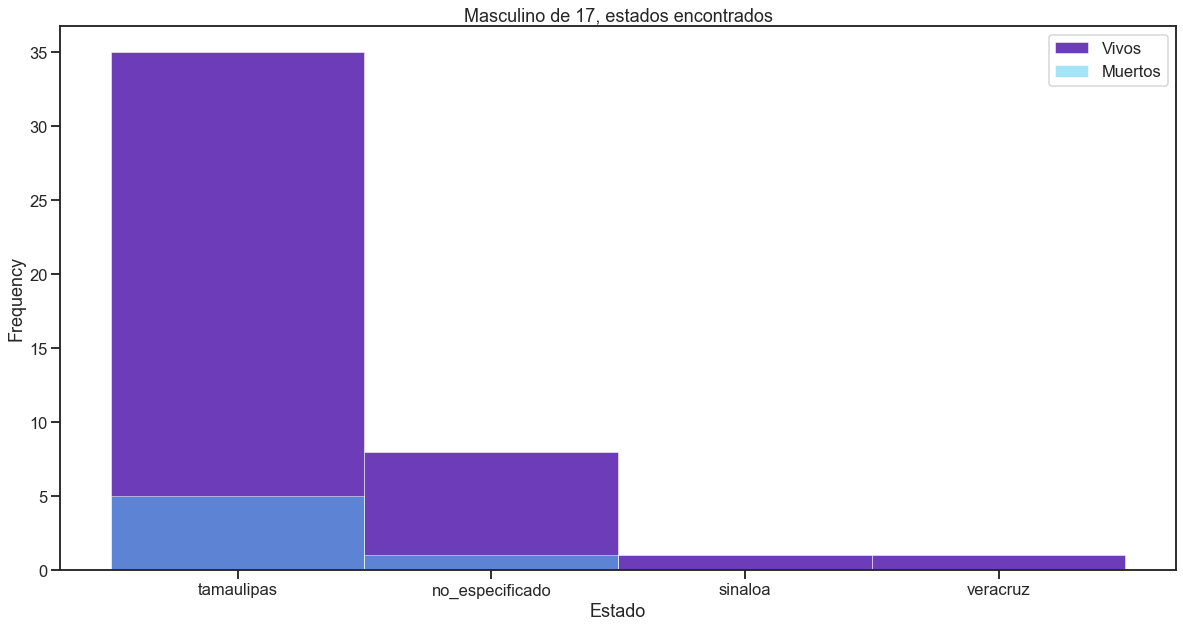

In [80]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
sns.histplot(tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Masculino de 17, estados encontrados')

plt.show()

### Posibles causas de desaparición

In [81]:
tamaulipas[(tamaulipas["sexo"] == "femenino") & (tamaulipas["edad"]== 17)].posible_causa_desaparicion.value_counts()

no_especificado                                                                                                                                                                                                                                                 31
sin_dato                                                                                                                                                                                                                                                         3
se_desconoce                                                                                                                                                                                                                                                     3
problemas_familiares                                                                                                                                                                                                           

In [82]:
tamaulipas[(tamaulipas["sexo"] == "masculino") & (tamaulipas["edad"]== 17)].posible_causa_desaparicion.value_counts()

no_especificado                                                                    15
se_desconoce                                                                        3
privacion                                                                           3
carretera_interejidal_km._27_y_28_ejido_el_arco_guemez,_tamaulipas                  1
se_fue_por_su_propia_voluntad.                                                      1
problemas_familiares,_se_fue_a_casa_de_su_abuela,_regreso_a_su_domicilio.           1
se_fue_de_la_casa_porque_se_queria_irse_con_su_novia                                1
fallecio_en_un_enfrentamiento                                                       1
se_fue_con_amigos_a_tomar_sin_avisar                                                1
no_sabe_que_le_paso_se_encontro_drogado                                             1
se_los_llevaron_unos_hombres_a_el_y_su_hermano_y_los_golpearon                      1
se_fue_a_la_ciudad_de_veracruz_con_unos_familiares    

## Días de busqueda, 17 años

In [83]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "vivo") & (tamaulipas["estado_localizado"] == "tamaulipas")].dias_de_busqueda_reporte.value_counts().head()

0 days     8
1 days     3
30 days    2
2 days     2
3 days     2
Name: dias_de_busqueda_reporte, dtype: int64

In [84]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "femenino") & (tamaulipas["vivo_o_muerto"] == "vivo") & (tamaulipas["estado_localizado"] == "tamaulipas")].dias_de_busqueda_evento.value_counts().head()

5 days     5
1 days     4
0 days     3
61 days    3
30 days    2
Name: dias_de_busqueda_evento, dtype: int64

In [85]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "vivo") & (tamaulipas["estado_localizado"] == "tamaulipas")].dias_de_busqueda_reporte.value_counts().head()

0 days 00:00:00         6
2 days 00:00:00         5
1 days 00:00:00         2
-4415 days +00:00:00    1
-31 days +10:49:10      1
Name: dias_de_busqueda_reporte, dtype: int64

In [86]:
tamaulipas[(tamaulipas["edad"] == 17 ) & (tamaulipas["sexo"]== "masculino") & (tamaulipas["vivo_o_muerto"] == "vivo") & (tamaulipas["estado_localizado"] == "tamaulipas")].dias_de_busqueda_evento.value_counts().head()

0 days        3
3 days        2
7 days        2
-4413 days    1
31 days       1
Name: dias_de_busqueda_evento, dtype: int64

## Datos aleatorios que se me ocurre buscar, 17 años

In [87]:
tamaulipas[(tamaulipas["edad"]==17)].discapacidad_mental.value_counts()

no    311
Name: discapacidad_mental, dtype: int64

In [88]:
tamaulipas[(tamaulipas["edad"]==17)].relacion_con_grupos_delictivos.value_counts()

no    311
Name: relacion_con_grupos_delictivos, dtype: int64

In [89]:
tamaulipas[(tamaulipas["edad"]==17)].enfermedad.value_counts()

no_especificado      161
ninguna               87
sin_dato              30
ninguno               26
anemia                 1
sin_datos              1
crisis_compulsiva      1
Name: enfermedad, dtype: int64

In [90]:
tamaulipas[(tamaulipas["edad"]==17)].ocupacion.value_counts()

estudiante                  53
no_especificado             35
desempleado                 19
empleado_particular         13
sin_dato                    11
ama_de_casa                  8
jornalero                    3
comerciante                  3
albañil                      3
estilista                    2
lavacoches                   2
pescador                     2
otros                        1
hogar                        1
bailarina_exotica            1
jardinero                    1
mecanico                     1
trabajador_independiente     1
Name: ocupacion, dtype: int64

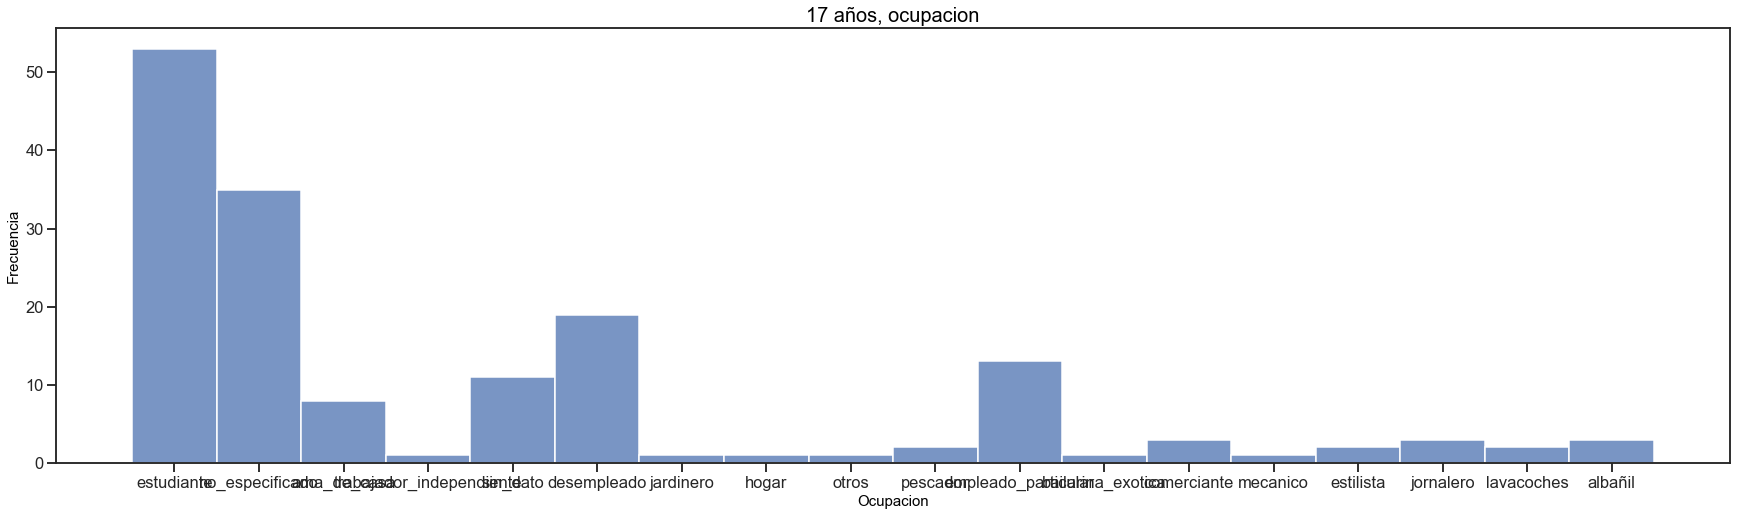

In [91]:
plt.figure(figsize=(30, 8))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frecuencia',fontdict=font2)
plt.xlabel('Ocupacion',fontdict=font2)
plt.title('17 años, ocupacion', fontdict=font1)

sns.histplot(tamaulipas[(tamaulipas["edad"] == 17 )].ocupacion)
plt.show()

# Vamos a ver en general como está la situación de localizados y no localizados en Tamaulipas

In [92]:
tamaulipas.year_reporte.value_counts()

2014    1993
2011    1826
2012    1636
2013    1195
2016     682
2015     637
2010     614
2009     366
2007     101
2008      66
2006      10
2017       2
Name: year_reporte, dtype: int64

In [93]:
tamaulipas.year_reporte.describe()

count    9128.000000
mean     2012.531223
std         1.952742
min      2006.000000
25%      2011.000000
50%      2012.000000
75%      2014.000000
max      2017.000000
Name: year_reporte, dtype: float64

In [94]:
tamaulipas[(tamaulipas["vivo_o_muerto"] == "vivo" )].year_reporte.value_counts()

2012    629
2014    573
2013    489
2011    416
2016    224
2009    207
2010    206
2015     83
2007     51
2008     21
2006      7
Name: year_reporte, dtype: int64

In [95]:
tamaulipas[(tamaulipas["vivo_o_muerto"] == "muerto" )].year_reporte.value_counts()

2012    65
2014    58
2013    34
2011    30
2015    14
2016    11
2010     8
2009     6
2006     2
2007     1
Name: year_reporte, dtype: int64

In [96]:
tamaulipas[(tamaulipas["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte.value_counts()

2011    1380
2014    1362
2012     942
2013     672
2015     540
2016     447
2010     400
2009     153
2007      49
2008      45
2017       2
2006       1
Name: year_reporte, dtype: int64

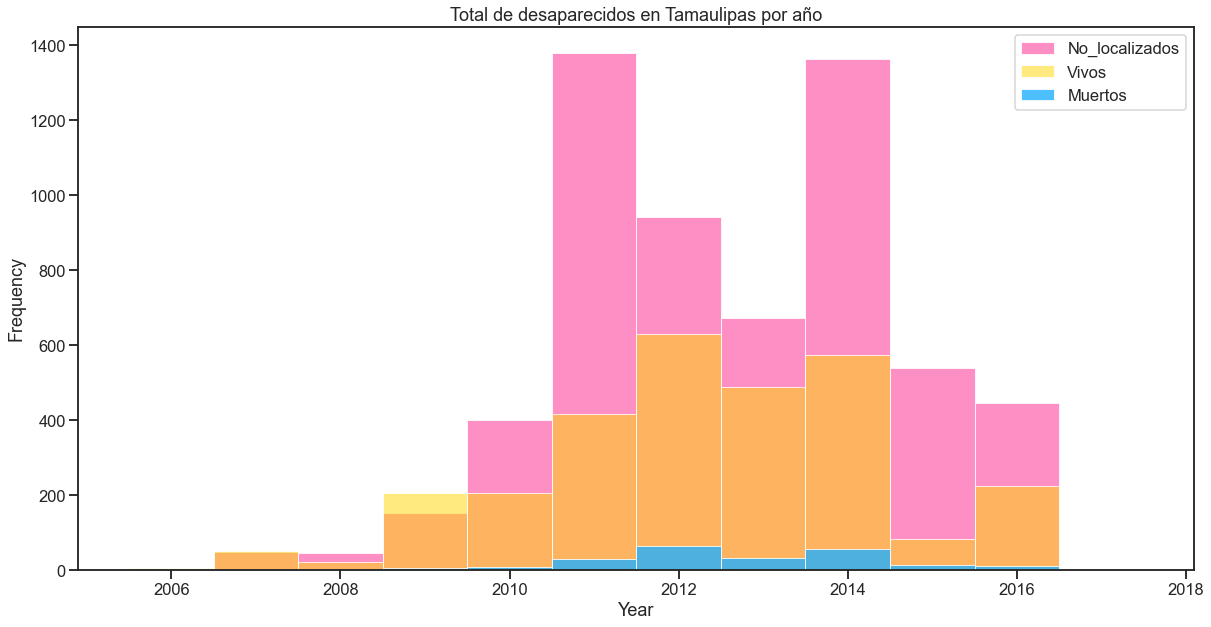

In [97]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(tamaulipas[(tamaulipas["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(tamaulipas[(tamaulipas["vivo_o_muerto"] == "vivo" )].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(tamaulipas[(tamaulipas["vivo_o_muerto"] == "muerto" )].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Total de desaparecidos en Tamaulipas por año')

plt.show()

# Estados localizados

In [98]:
tamaulipas.estado_localizado.value_counts()

tamaulipas              1814
no_especificado         1291
nuevo_leon                40
veracruz                  26
san_luis_potosi           15
texas                     10
guanajuato                 8
distrito_federal           8
estado_de_mexico           7
coahuila_de_zaragoza       4
hidalgo                    4
queretaro                  3
nayarit                    2
michoacan                  2
chihuahua                  1
aguascalientes             1
jalisco                    1
sinaloa                    1
campeche                   1
chiapas                    1
puebla                     1
baja_california            1
durango                    1
Name: estado_localizado, dtype: int64

In [99]:
tamaulipas[(tamaulipas["vivo_o_muerto"] == "vivo" )].estado_localizado.value_counts()

tamaulipas              1663
no_especificado          905
nuevo_leon                37
veracruz                  24
san_luis_potosi           15
texas                     10
guanajuato                 8
distrito_federal           8
estado_de_mexico           7
coahuila_de_zaragoza       4
hidalgo                    4
queretaro                  3
nayarit                    2
michoacan                  2
chihuahua                  1
aguascalientes             1
jalisco                    1
sinaloa                    1
campeche                   1
chiapas                    1
puebla                     1
baja_california            1
durango                    1
Name: estado_localizado, dtype: int64

In [100]:
tamaulipas[(tamaulipas["vivo_o_muerto"] == "muerto" )].estado_localizado.value_counts()

tamaulipas         151
no_especificado     69
nuevo_leon           3
veracruz             2
Name: estado_localizado, dtype: int64

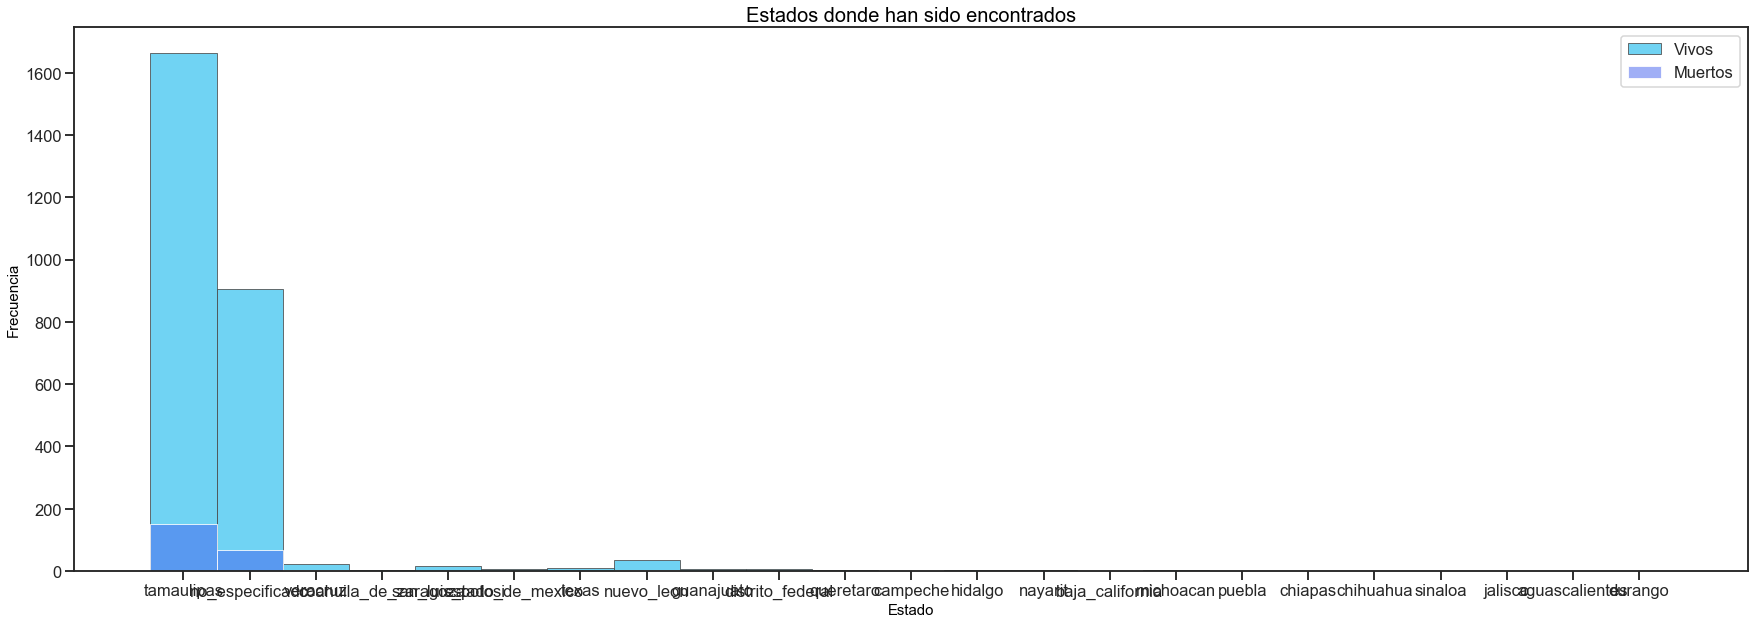

In [101]:
plt.figure(figsize=(30,10))

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

sns.histplot(tamaulipas[(tamaulipas["vivo_o_muerto"] == "vivo" )].estado_localizado, label='Vivos', color="#4cc9f0", alpha=0.8,edgecolor=".3",linewidth=.8)
sns.histplot(tamaulipas[(tamaulipas["vivo_o_muerto"] == "muerto" )].estado_localizado, label='Muertos', color="#4361ee", alpha=0.5,linewidth=.8)

plt.legend()

plt.ylabel('Frecuencia',fontdict=font2)
plt.xlabel('Estado',fontdict=font2)
plt.title('Estados donde han sido encontrados',fontdict=font1)

plt.show()